# Laboratorium 5 - Wstęp do biblioteki Pandas

Celem laboratorium jest utrwalenie dotychczas zaprezentowanego materiału i wprowadzenie do biblioteki Pandas, która jest jedną z głównych bibliotek stosowanych do analizy danych dla języka Python.

Zacznijmy od wczytania potrzebnych bibliotek:


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
%matplotlib inline

W ramach zajęć wykonaj następujące zadania:

Zadanie 1.

Wczytaj plik iris.csv wykorzystując bibliotekę pandas. Wypisz uzyskany dataframe. Policz średnie oraz odchylenia
standardowe dla każdej kolumny. Policz korelację pomiędzy poszczególnymi kolumnami. Określ
liczność poszczególnych klas. Narysuj wykres analogiczny do Zadania 3. z Laboratorium 4. bez bezpośredniego
rzutowania danych na oddzielnie wektory.

     sepal.length  sepal.width  petal.length  petal.width    variety
0             5.1          3.5           1.4          0.2     Setosa
1             4.9          3.0           1.4          0.2     Setosa
2             4.7          3.2           1.3          0.2     Setosa
3             4.6          3.1           1.5          0.2     Setosa
4             5.0          3.6           1.4          0.2     Setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  Virginica
146           6.3          2.5           5.0          1.9  Virginica
147           6.5          3.0           5.2          2.0  Virginica
148           6.2          3.4           5.4          2.3  Virginica
149           5.9          3.0           5.1          1.8  Virginica

[150 rows x 5 columns]
Mean:
sepal.length    5.843333
sepal.width     3.057333
petal.length    3.758000
petal.width     1.199333
dtype: float64
Std:
sepal.length    0.8253

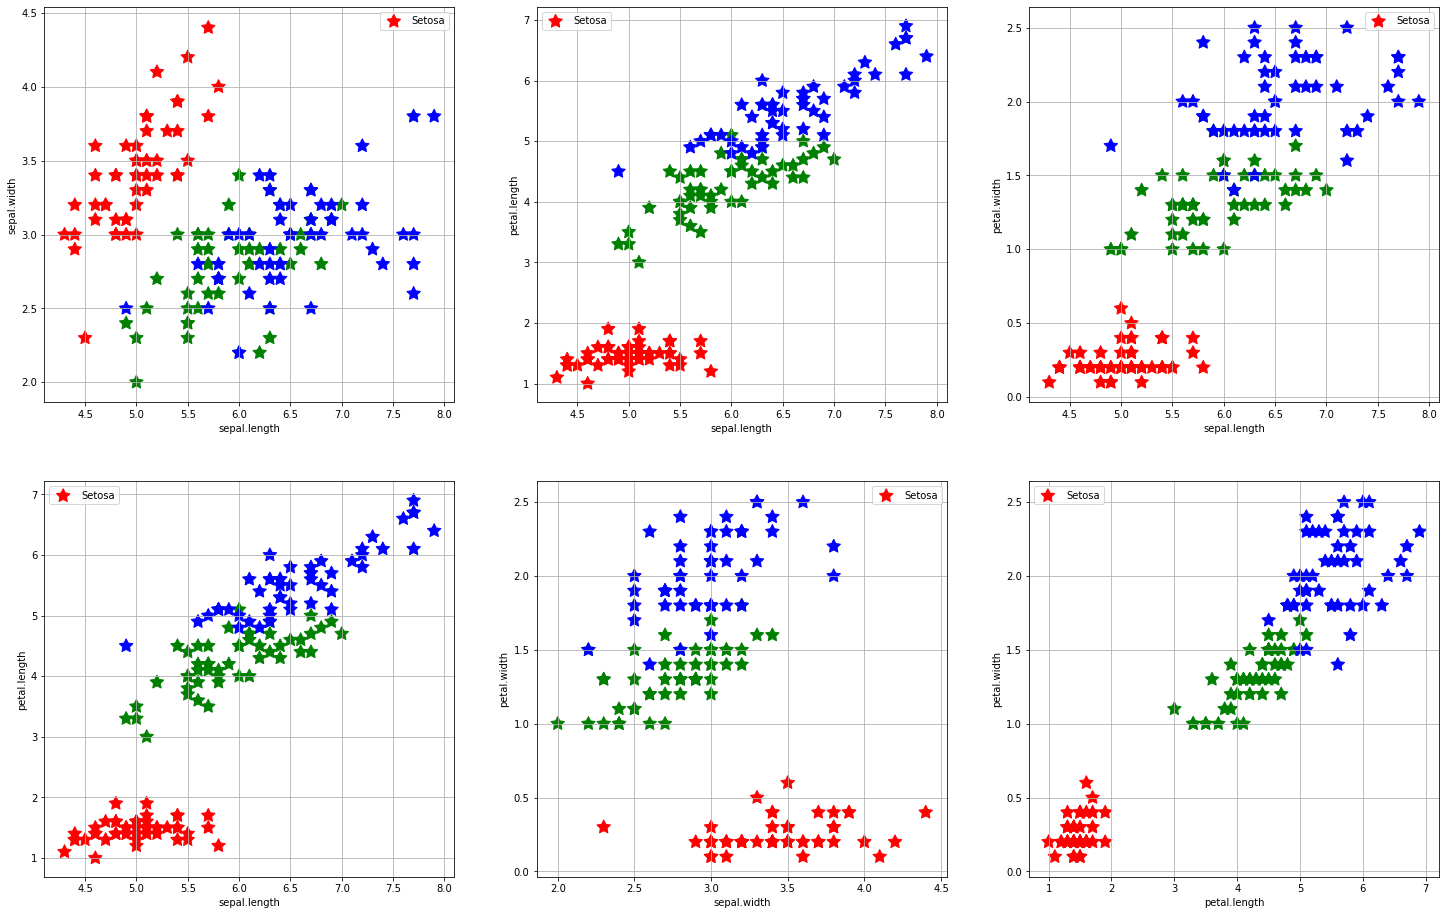

In [3]:
iris = pandas.read_csv('iris.csv')
iris = pandas.DataFrame(iris)
print(iris)

print('Mean:')
print(np.mean(iris))

print('Std:')
print(np.std(iris))

print('Correlation:')
print(iris.corr(method ='pearson'))
  
versi = iris[iris['variety']=="Versicolor"]
setos = iris[iris['variety']=="Setosa"]
virgi = iris[iris['variety']=="Virginica"]

print('Versicolor:', len(versi))
print('Setosa:', len(setos))
print('Virginica:', len(virgi))


fig, axs = plt.subplots(2,3, figsize = (25, 16))
colors = {}
colors["Setosa"] = "red"
colors["Versicolor"] = "green"
colors["Virginica"] = "blue"

spl = 'sepal.length'
spw = 'sepal.width'
ptl = 'petal.length'
ptw = 'petal.width'

value = {}
value[-1] = spl
value[0] = spw
value[1] = ptl
value[2] = ptw
value[3] = ptw

for i in range(3):
    axs[0,i].scatter(iris[spl],iris[value[i]],
                     c = [ colors[x] for x in iris["variety"]], 
                     marker =(5,1,0), s = 200)
    axs[0,i].legend(iris["variety"])
    axs[0,i].set_ylabel(value[i])
    axs[0,i].set_xlabel(spl)
    axs[0,i].grid(True)
    
    
    axs[1,i].scatter(iris[value[i-1]],iris[value[i+1]], 
                     c = [ colors[x] for x in iris["variety"]],
                     marker =(5,1,0), s = 200)
    axs[1,i].legend(iris["variety"])
    axs[1,i].set_ylabel(value[i+1])
    axs[1,i].set_xlabel(value[i-1])
    axs[1,i].grid(True)
    
#Wykres [0,0] jest zrobiony zgodnie z opisem osi w przykładzie.
    

Oczekiwany rezultat:

sepal.length  sepal.width  petal.length  petal.width    variety
0             5.1          3.5           1.4          0.2     Setosa
1             4.9          3.0           1.4          0.2     Setosa
2             4.7          3.2           1.3          0.2     Setosa
3             4.6          3.1           1.5          0.2     Setosa
4             5.0          3.6           1.4          0.2     Setosa
5             5.4          3.9           1.7          0.4     Setosa
6             4.6          3.4           1.4          0.3     Setosa
7             5.0          3.4           1.5          0.2     Setosa
8             4.4          2.9           1.4          0.2     Setosa
9             4.9          3.1           1.5          0.1     Setosa
10            5.4          3.7           1.5          0.2     Setosa
11            4.8          3.4           1.6          0.2     Setosa
12            4.8          3.0           1.4          0.1     Setosa
13            4.3          3.0         

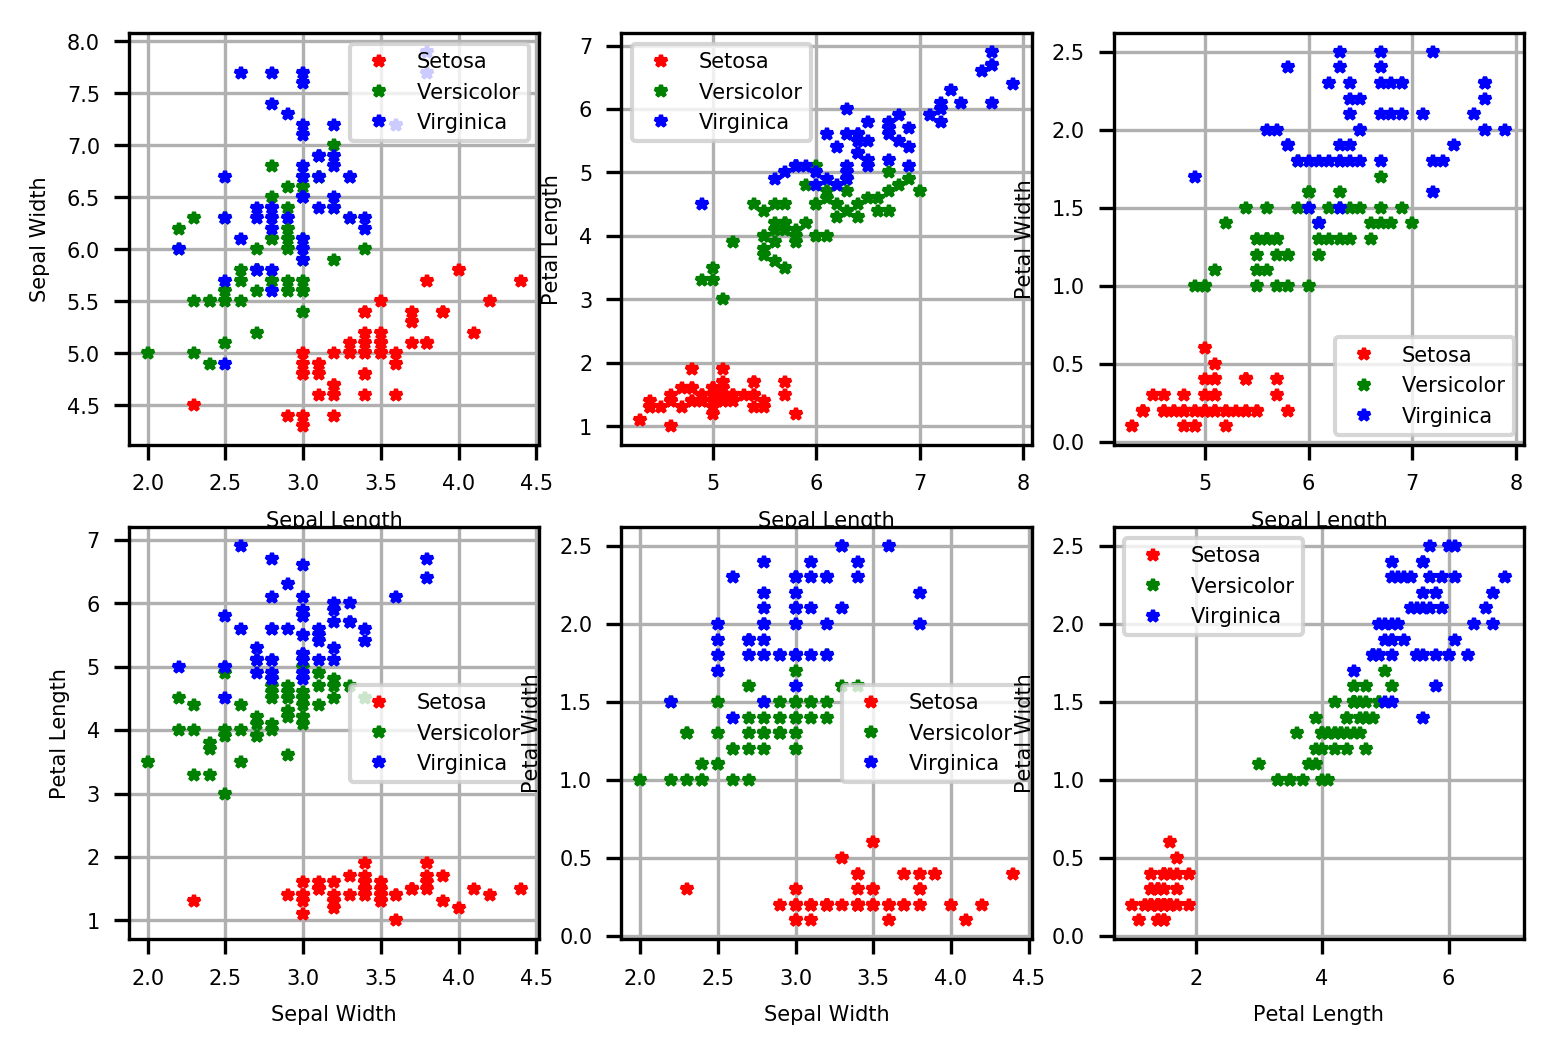

Zadanie 2.

Zdefiniuj klasę IrisFlower zawierającą składowe: sepal_length, sepal_width, petal_length, petal_width oraz
variety. Przeciąż operator "mniejszy niż" oraz dodaj mechanizm umożliwiający wybór pola porównywanego
w wspomnianym operatorze. Tzn. użytkownik definiujący liste˛ IrisFlower powinien bez problemu móc ja˛
posortować funkcją sorted wybierając porównywany parametr. Przeciąż funkcje odpowiedzialne za konwersje
do łańcucha oraz reprezentacji w kolekcji tak, aby pokazywały: "Sepal Length, Sepal Width, Petal Length,
Petal Width, Variety". Następnie zdefiniuj funkcję load_iris, która umożliwi wczytanie pliku iris.csv do listy
obiektów klasy IrisFlower. Następnie zdefiniuj dwie funkcje: pierwszą. która umożliwi konwersje tak wygenerowanej
listy do Dataframe biblioteki pandas oraz drugą, która umożliwi konwersje w drugą stronę.


In [5]:
class IrisFlower:
    def __init__(self, sepal_length, sepal_width, petal_length, petal_width, variety):
        self.sepal_length = sepal_length
        self.sepal_width = sepal_width
        self.petal_length = petal_length
        self.petal_width = petal_width
        self.variety = variety
   
    def __repr__(self):
        return f"Iris: {self.sepal_length}, {self.sepal_width}, {self.petal_length}, {self.petal_length}, {self.variety}"
    
    def area(self):
        return (self.sepal_length * self.sepal_width) + (self.petal_length * self.petal_width)
    
    def __lt__(self, other):
        return self.area() < other.area()
    
path = 'iris.csv'    
    
def load_iris(path):    
    iris: pandas.DataFrame = pandas.read_csv(path)
    results = []
    for index, row in iris.iterrows():
        iris_objects = IrisFlower(row["sepal.length"], row["sepal.width"],row["petal.length"], row["petal.width"], row['variety'] )
        results.append(iris_objects)
    return results

def write_iris(iris_flowers, out_path):
    our_df = pandas.DataFrame(columns=['sepal.length', 'sepal.width', 'petal.length', 'sepal.width', 'variety'])
    for flower in iris_flowers:
        our_df.append(flower.sepal_length, flower.sepal_width, flower.petal_length, flower.petal_width, flower.variety)
        

our_flowers = load_iris(path)
our_flowers

iris_flower: pandas.DataFrame = pandas.read_csv(path)
print(iris_flower)

     sepal.length  sepal.width  petal.length  petal.width    variety
0             5.1          3.5           1.4          0.2     Setosa
1             4.9          3.0           1.4          0.2     Setosa
2             4.7          3.2           1.3          0.2     Setosa
3             4.6          3.1           1.5          0.2     Setosa
4             5.0          3.6           1.4          0.2     Setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  Virginica
146           6.3          2.5           5.0          1.9  Virginica
147           6.5          3.0           5.2          2.0  Virginica
148           6.2          3.4           5.4          2.3  Virginica
149           5.9          3.0           5.1          1.8  Virginica

[150 rows x 5 columns]


Zadanie 3.

Wczytaj w dowolny sposób plik iris.csv i narysuj rysunek prezentujący histogramy widoczne poniżej. Wyjaśnij dlaczego histogram nie jest najlepszym sposobem prezentacji widocznych danych. Następnie wygeneruj wykresy widoczne poniżej.

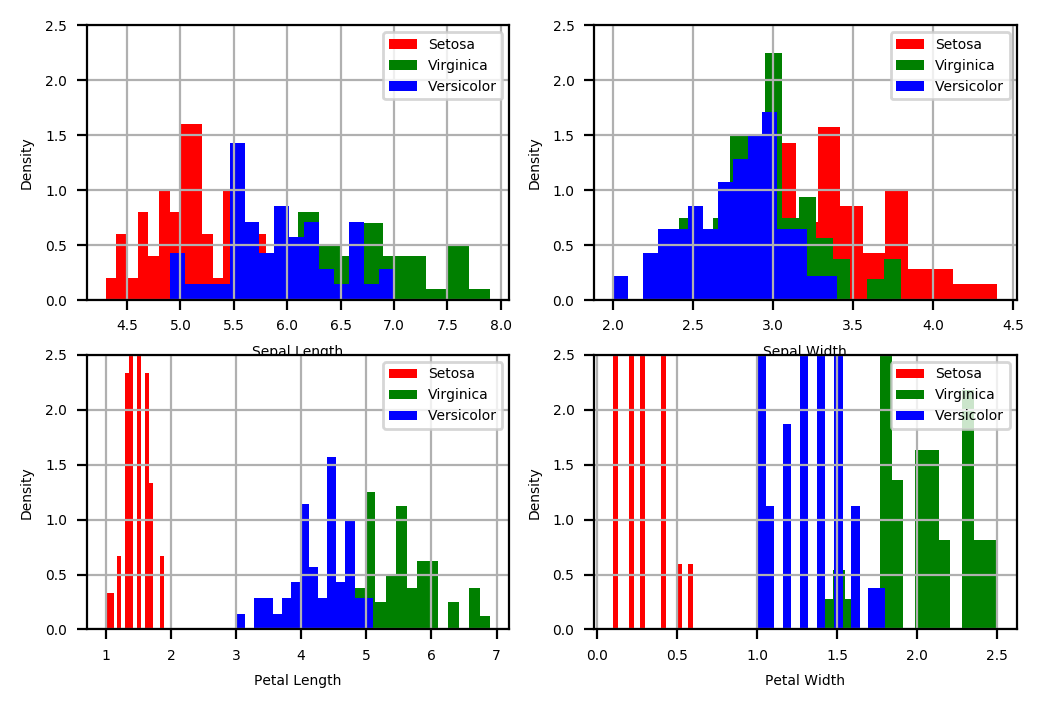

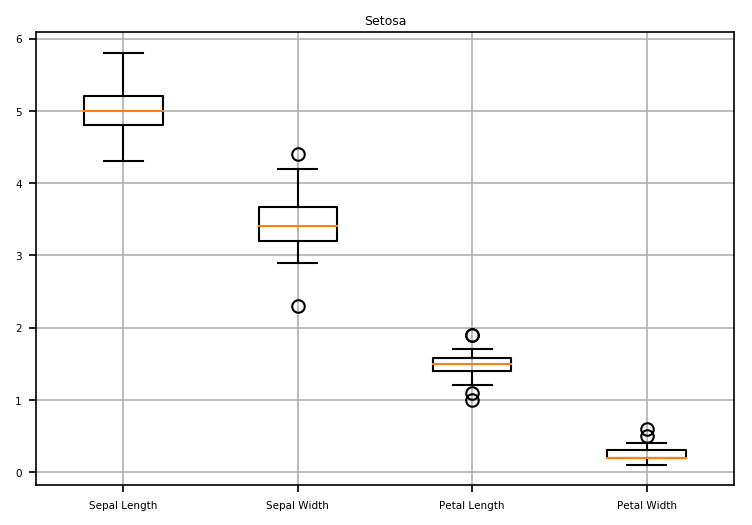

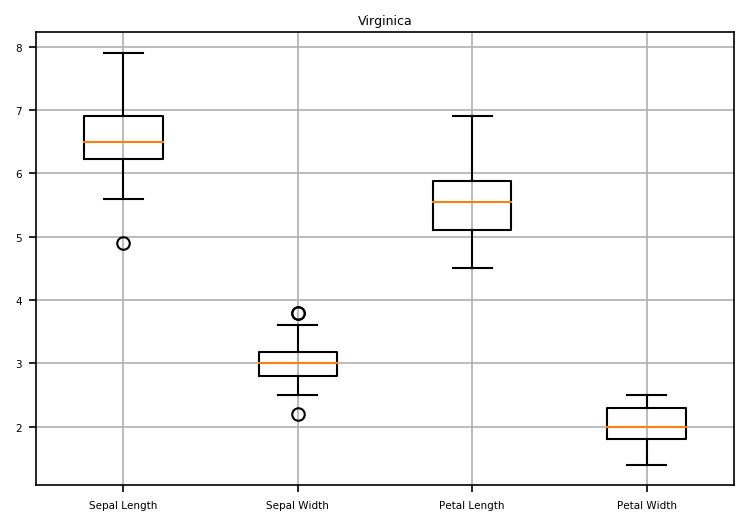

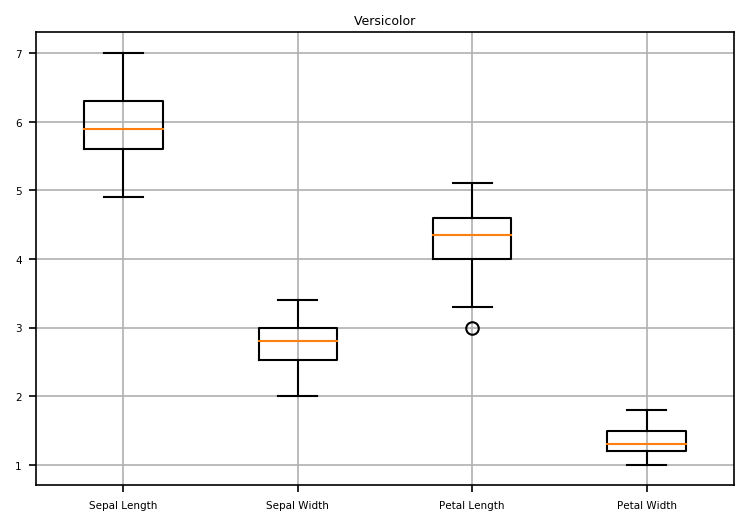

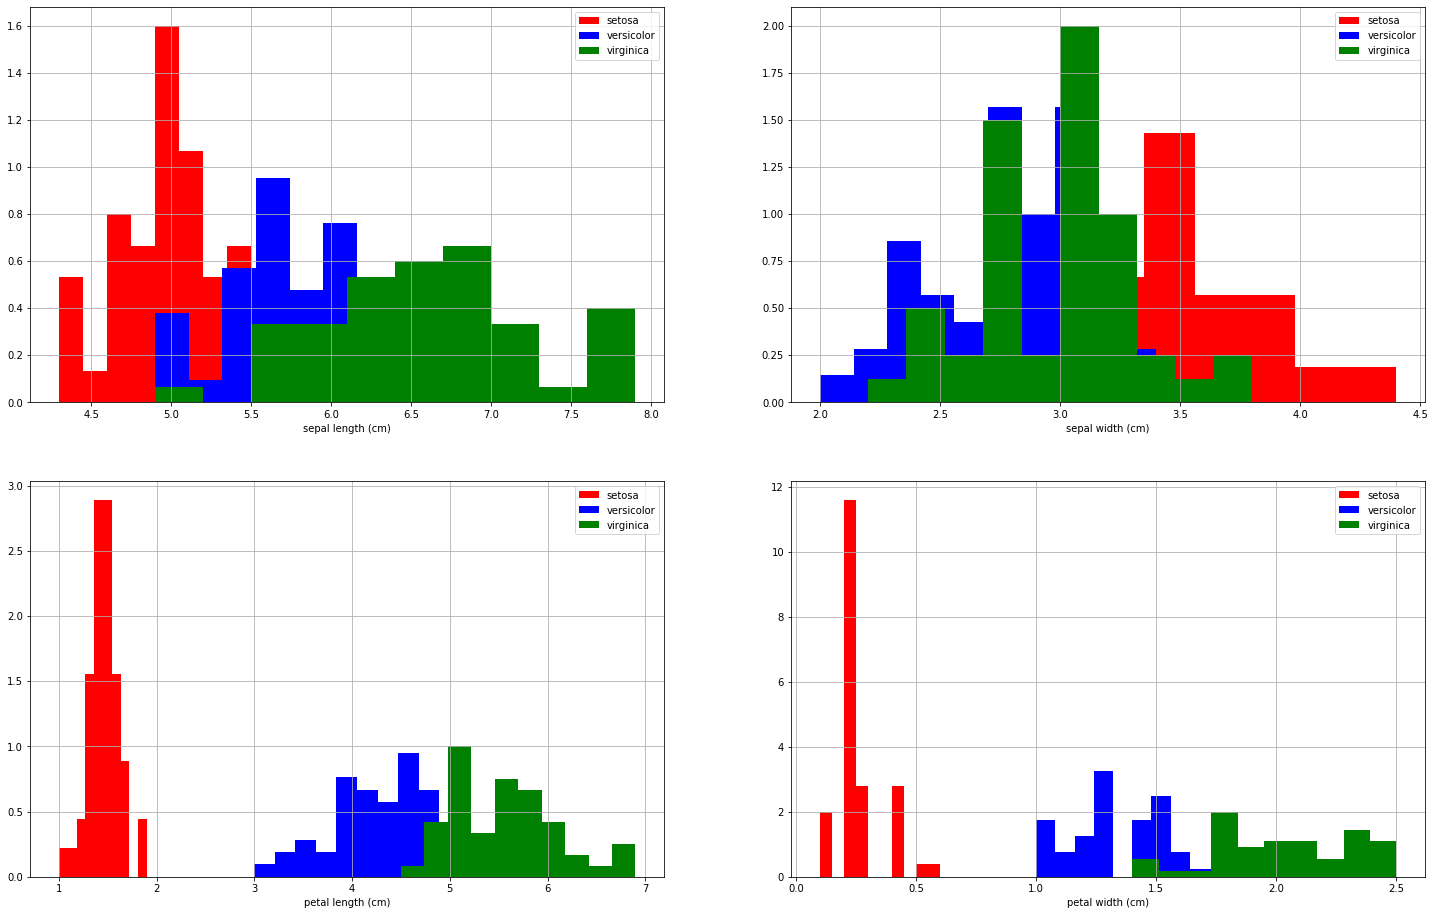

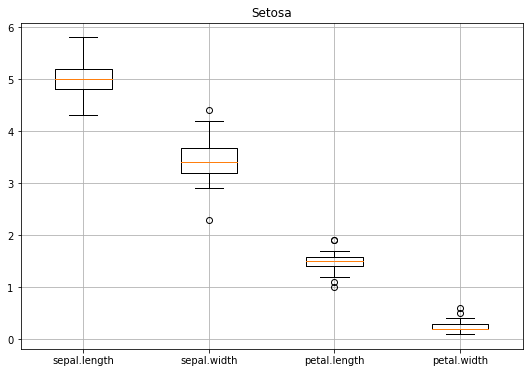

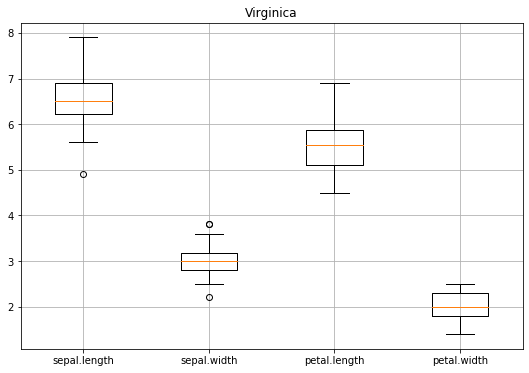

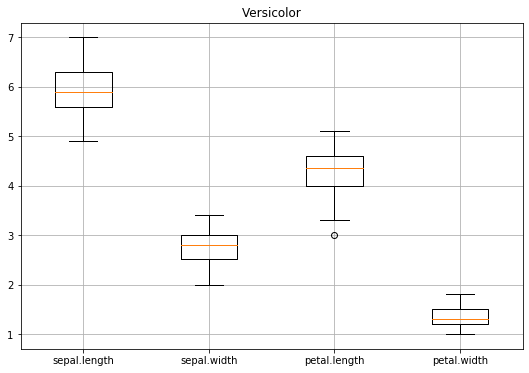

In [6]:
import matplotlib.pyplot as plt
from sklearn import datasets
iris = datasets.load_iris()

fig, axes = plt.subplots( nrows= 2, ncols=2, figsize=(25, 16))
colors= ['red', 'blue', 'green']

for i, ax in enumerate(axes.flat):
    for label, color in zip(range(len(iris.target_names)), colors):
        ax.hist(iris.data[iris.target==label, i], label=             
                            iris.target_names[label], color=color, density = True)
        ax.set_xlabel(iris.feature_names[i])  
        ax.legend(loc='upper right')
        ax.grid(True)
plt.show()

VERSI = versi.loc[0:,"sepal.length":"petal.width"]
VIRGI = virgi.loc[0:,"sepal.length":"petal.width"]

s1 = setos.loc[:,"sepal.length"]
s2 = setos.loc[:,"sepal.width"]
s3 = setos.loc[:,"petal.length"]
s4 = setos.loc[:,"petal.width"]

ve1 = versi.loc[:,"sepal.length"]
ve2 = versi.loc[:,"sepal.width"]
ve3 = versi.loc[:,"petal.length"]
ve4 = versi.loc[:,"petal.width"]

vi1 = virgi.loc[:,"sepal.length"]
vi2 = virgi.loc[:,"sepal.width"]
vi3 = virgi.loc[:,"petal.length"]
vi4 = virgi.loc[:,"petal.width"]

SETOSA = [s1, s2, s3, s4]
VERSI = [ve1, ve2, ve3, ve4]
VIRGI = [vi1, vi2, vi3, vi4]

fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
ax.boxplot(SETOSA)
ax.set_xticklabels(['sepal.length', 'sepal.width', 'petal.length', 'petal.width'])
ax.set_title("Setosa")
ax.grid(True)
plt.show()

fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
ax.boxplot(VIRGI)
ax.set_xticklabels(['sepal.length', 'sepal.width', 'petal.length', 'petal.width'])
ax.set_title("Virginica")
ax.grid(True)
plt.show()

fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
ax.boxplot(VERSI)
ax.set_xticklabels(['sepal.length', 'sepal.width', 'petal.length', 'petal.width'])
ax.set_title("Versicolor")
ax.grid(True)
plt.show()



Zadanie 4.

Zaproponuj trzy sposoby (jedna linia kodu) na wyznaczenie przekątnej głównej rezultatu mnożenia dwóch macierzy kwadratowych.
Przykładowy rezultat:

A: 
 [[ 0.4412 -0.3309  2.4308 -0.2521]
 [ 0.1096  1.5825 -0.9092 -0.5916]
 [ 0.1876 -0.3299 -1.1928 -0.2049]
 [-0.3588  0.6035 -1.6648 -0.7002]]
B: 
 [[ 1.1514  1.8573 -1.5112  0.6448]
 [-0.9806 -0.8569 -0.8719 -0.4225]
 [ 0.9964  0.7124  0.0591 -0.3633]
 [ 0.0033 -0.1059  0.7931 -0.6316]]
Result: 
[ 3.2538 -1.7375 -0.2289  0.5607]
[ 3.2538 -1.7375 -0.2289  0.5607]
[ 3.2538 -1.7375 -0.2289  0.5607]



In [7]:
A = np.array([[ 0.4412, -0.3309,  2.4308, -0.2521], 
              [ 0.1096,  1.5825, -0.9092, -0.5916], 
              [ 0.1876, -0.3299, -1.1928, -0.2049], 
              [-0.3588,  0.6035, -1.6648, -0.7002]])

B = np.array([[ 1.1514,  1.8573, -1.5112,  0.6448],
              [-0.9806, -0.8569, -0.8719, -0.4225],
              [ 0.9964,  0.7124,  0.0591, -0.3633],
              [ 0.0033, -0.1059,  0.7931, -0.6316]])

C = np.dot(A,B)

a1 = np.array(C.diagonal())

a2 = np.diag(C)

a3 = [round(float(C[(0), 0:1]),9), round(float(C[(1), 1:2]),9), round(float(C[(2), 2:3]),9), round(float(C[(3), 3:4]),9)]


print("A: \n", A)
print("B: \n", B)
print("C: \n", C)

print("Result:")
print(a1)
print(a2)
print(a3) 


A: 
 [[ 0.4412 -0.3309  2.4308 -0.2521]
 [ 0.1096  1.5825 -0.9092 -0.5916]
 [ 0.1876 -0.3299 -1.1928 -0.2049]
 [-0.3588  0.6035 -1.6648 -0.7002]]
B: 
 [[ 1.1514  1.8573 -1.5112  0.6448]
 [-0.9806 -0.8569 -0.8719 -0.4225]
 [ 0.9964  0.7124  0.0591 -0.3633]
 [ 0.0033 -0.1059  0.7931 -0.6316]]
C: 
 [[ 3.25369541  2.86138828 -0.43450996 -0.29959227]
 [-2.33348522 -1.73754781 -2.06834095  0.10603075]
 [-0.64967951 -0.19693102 -0.22886198  0.82310631]
 [-2.6660318  -2.29539073 -0.63769139  0.56073517]]
Result:
[ 3.25369541 -1.73754781 -0.22886198  0.56073517]
[ 3.25369541 -1.73754781 -0.22886198  0.56073517]
[3.25369541, -1.73754781, -0.22886198, 0.56073517]


Zadanie 5.

Zdefiniuj dowolny wektor o długości 10 elementrów. Każdy element o parzystym indeksie podnieś do kwadratu, a każdy element o nieparzystym indeksie wyzeruj.

Przykładowy rezultat:

Input vector:  [-0.0062 -0.1011 -0.0523  0.2492  0.1977  1.3348 -0.0869  1.5615 -0.3059
 -0.4777]
Output vector:  [3.8377e-05 0.0000e+00 2.7361e-03 0.0000e+00 3.9070e-02 0.0000e+00
 7.5474e-03 0.0000e+00 9.3546e-02 0.0000e+00]


In [8]:
vector = np.array([-0.0062, -0.1011, -0.0523,  0.2492,  0.1977,  1.3348, -0.0869,  1.5615, -0.3059, -0.4777])
newvector = np.zeros(10)
for i in range(10):
    if i%2==0 or i==0:
        newvector[i]=vector[i]*vector[i]

print("Input vector: ", vector)
print("Output vector: ", newvector)

Input vector:  [-0.0062 -0.1011 -0.0523  0.2492  0.1977  1.3348 -0.0869  1.5615 -0.3059
 -0.4777]
Output vector:  [3.844000e-05 0.000000e+00 2.735290e-03 0.000000e+00 3.908529e-02
 0.000000e+00 7.551610e-03 0.000000e+00 9.357481e-02 0.000000e+00]


Zadanie 6.

Wygeneruj losowy wektor 20 liczb rzeczywistych. Napisz funkcję, która zwróci N (argument) największych wartości.

Przykładowy rezultat:

In [6]:
array = np.random.randn(20)

def n_largest(array, n):
	# TO DO
	pass

print("Array: ", array)
print("N largest: ", n_largest(array, 5))

Array:  [ 0.1007  0.3554  0.2696  1.292   1.1393  0.4944 -0.3363 -0.1006  1.4134
  0.2213 -1.3108 -0.6896 -0.5775  1.1522 -0.1072  2.2601  0.6566  0.1248
 -0.4357  0.9722]
N largest:  [2.2601 1.4134 1.292  1.1522 1.1393]


In [9]:
array = np.random.randn(20)

def n_largest(array, n):
    largest = [] 
    for i in range(n):
        m = max(array)
        array = array[array != m]
        largest.append(m)
    return largest

print("Array: ", array)
print("N largest: ", n_largest(array, 5))

Array:  [ 0.58420036  1.15051568 -1.21660863  0.64211591 -0.30770834  0.49705339
  0.60240347 -0.47612469  1.44439815 -0.89379926  0.19254465 -1.07189573
  0.95711847  1.64910714 -1.26431833 -0.91448087 -1.04460535  0.41710683
 -0.21136141  2.09891257]
N largest:  [2.09891257111462, 1.6491071411957223, 1.4443981463468916, 1.1505156800888632, 0.9571184733826962]


Zadanie 7.

Zdefiniuj dowolną tablicę. Spraw by próba zmiany wartości zadanej tablicy skutkowała zgłoszeniem błędu.

Przykładowy rezultat:

In [7]:
array = np.zeros(10)

# TO DO

try:
	array[5] = 7
except Exception as e:
	print(e)

print()


assignment destination is read-only



In [3]:
array = np.zeros(10)

# Niestety nie wiem jak zrobić to zadanie

try:
    array[5] = 7
except Exception as e:
    print(e)

print(array)

[0. 0. 0. 0. 0. 7. 0. 0. 0. 0.]


Zadanie 8.

Zdefiniuj funkcję liczącą rząd macierzy wejsciowej bez użycia funkcji matrix_rank z biblioteki numpy.

Przykładowy rezultat:

In [8]:
def my_rank(matrix):
	# TO DO
	pass

array = np.random.uniform(0, 1, (10,10))
print("Initial rank: ", my_rank(array))
array[9, :] = 0
print("Changed rank: ", my_rank(array))


Initial rank:  10
Changed rank:  9


In [10]:
def swap(matrix, row1, row2, col):
    for i in range(col):
        temp = matrix[row1][i] 
        matrix[row1][i] = matrix[row2][i] 
        matrix[row2][i] = temp 
    pass

 
def my_rank(matrix): 
    rank = len(matrix[0])
    for row in range(0, rank, 1): 
        
        if matrix[row][row] != 0: 
            for col in range(0, len(matrix), 1): 
                if col != row: 

                    multiplier = (matrix[col][row] /
                                matrix[row][row]) 
                    for i in range(rank): 
                        matrix[col][i] -= (multiplier *
                                        matrix[row][i]) 
        else: 
            reduce = True

            for i in range(row + 1, len(matrix), 1): 

                if matrix[i][row] != 0: 
                    swap(matrix, row, i, rank) 
                    reduce = False
                    break

            if reduce: 
                rank -= 1
                for i in range(0, len(matrix), 1): 
                     matrix[i][row] = matrix[i][rank] 

            row -= 1

    return (rank) 

array = np.random.uniform(0, 1, (10,10))
print ("Inital rank:", (my_rank(array))) 
array[9, :] = 0
print ("Changed rank:", (my_rank(array)))


Inital rank: 10
Changed rank: 9


Zadanie 9.

Zdefiniuj ustrukturyzowaną tablicę (np.array) zawierającą w każdym polu pozycję (x, y, z), a następnie wypełnij ją losowymi wartościami.

Przykładowy rezultat:

[( 0.9275, -1.5997,  0.3056) ( 1.64  ,  0.8772,  0.5218)
 ( 2.0736, -0.0938,  2.2333) ( 0.7098, -0.0557, -0.0347)
 ( 0.7472, -0.8894, -1.2796) ( 1.4631, -1.301 ,  0.0365)
 ( 1.7384,  1.4022, -0.6464) ( 1.4652,  0.4651,  0.5486)
 ( 1.2123, -1.065 ,  0.2105) (-0.6347,  0.3904,  0.3465)]



In [12]:
tab = np.zeros((5,2),dtype=([('x','f2'), ('y', 'f2'), ('z', 'f2')]))
for i in range(5):
    tab[i,0] = (np.random.sample(),np.random.sample(),np.random.sample())
    tab[i,1] = (np.random.sample(),np.random.sample(),np.random.sample())
print(tab)

[[(0.8613 , 0.10913, 0.5654 ) (0.01927, 0.41   , 0.92   )]
 [(0.00937, 0.5444 , 0.3328 ) (0.669  , 0.68   , 0.9233 )]
 [(0.813  , 0.447  , 0.2573 ) (0.4783 , 0.871  , 0.4421 )]
 [(0.07697, 0.1392 , 0.2869 ) (0.612  , 0.942  , 0.6646 )]
 [(0.684  , 0.5244 , 0.2092 ) (0.1948 , 0.9624 , 0.04852)]]
